# スペクトル解析 1日目

**注意** :
本実験では binder というサービスを使って web ブラウザ上で Python プログラムを実行できる環境を構築しています。
binder はウィンドウを閉じると10分、プログラム自体は12時間で終了してしまうので、
時間を置いて作業する場合には、課題の計算結果や考察のテキストは別途テキストエディタなどで保存しておいて、 binder を再実行した後に反映させてください。

## 課題の進め方

本実験では、離散データを用いたフーリエ級数の合成やパワースペクトルの計算などを プログラミング言語 "Python" で行います。ここではプログラムはセルと呼ぶ要素に分割されており、このセル毎に必要なら変数を代入し実行していく形で課題を進めます。下流のセルでは上流のセルで代入した変数や定義文を用いるので上から順にセルを実行していってください。

セルのプログラムを実行するテストをしてみましょう。
次のセル(# テストセル)をアクティブにし(セルの左側に水色線が入る)、変数 `a =` の 右辺に数値を代入し、実行してください ( ▶︎ を押す)。セルの下にいくつかの四則演算の計算結果が出力されます。


In [1]:
# テストセル
'''
例
a = 10
'''

a = 10
b = 2.
c = 5

d = a+b-c
e = a*c/2

print("a+b-c =",d)
print("a*c/b =",e)

a+b-c = 7.0
a*c/b = 25.0


以降のセルでは、代入する必要のある変数は

###############################################################

###############################################################

で囲まれています。それ以外の箇所のコードは変更しないようにしてください。
コードを変更したなどうまく実行できない状態になった場合は binder を立ち上げ直して始めてください。
また、実験の原理に関する説明をここでは最小限でしかおこなっていないので、詳細は Course Power 上にあるスペクトル解析テキスト(以下テキストと呼ぶ)を参照してください。


## 1.1 学生番号, 学生名の入力

次のセルの変数 `id_st` に学生番号を、`name_st` に学生名を代入し、セルを実行してください。正しく実行できれば学生番号と学生名が出力されます。

In [8]:
'''
学生番号(id_st)、学生名(name_st)を入力
'''
###############################################################
id_st = 15100000
name_st = "中村剛也" # 文字列は "" で囲む
###############################################################

print("学生番号:", id_st)
print("学生名:", name_st)


学生番号: 15100000
学生名: 中村剛也


## 1.2 コンピュータによる離散フーリエ変換
詳細はテキスト 7.2 節を参照

フーリエ変換をコンピュータで計算する場合、無限大の区間を無限小幅で積分するような連続的な値を扱うことは不可能で、離散的な値を扱う必要があります。関数 $X(t)$ のデータを取得する場合を考えるとき、**時間間隔** $\Delta t$ ごと時刻 $t_{0},t_{1},...t_{N-1}$ の時の $X(t)$ の値が $X(t_{0}),X(t_{1})...X(t_{N-1})$ とすると、離散データのフーリエ変換は
\begin{equation}
    S(\omega_{k}) = \frac{T}{N}\sum_{n=0}^{N-1}X(t_{n})\exp{-i\omega_{k}t_{k}}
\end{equation}
のように計算できます。データが $N$個の場合、データ全体の時間 $T$は $T=N\Delta t$ となります。

このように本来連続的な現象から離散的なデータを取り出すことを「サンプリング」と呼びます。サンプリングの間隔 $\Delta t$ を細かくしていけば元の現象に忠実なデータが得られますが、有限のサイズであるコンピュータでは記録容量が大きくなり計算処理能力も必要になっていきます。

ここで
\begin{equation}
    f_{s} = 1/\Delta t
\end{equation}
を**サンプリング周波数**と呼びます。$\Delta t$ がこのデータの最も短い時間間隔なのでそれより短い時間変動、 
周波数で言えば $f_{s}$ より大きい周波数の変動はこのデータでは原理的に捉えることができません。
このようなデータで再現できる限界の周波数を**ナイキスト周波数** $f_{n}$ と呼び、周期を推定できる最小の単位がデータ2点とすると、ナイキスト周波数はサンプリング周波数に対して 
\begin{equation}
    f_{n} = f_{s}/2
\end{equation}
となります。データにこれより大きい周波数の信号が含まれているとパワースペクトルに偽のピークが現れる**エリアシング**という現象が起きてしまう可能性が出てきます。

次のセルではプログラムの初期設定と、$f_{s} = 2048$ [Hz] とした場合の各種変数の設定を行います。
セルを実行するとサンプリングに関するパラメータの数値が出力されます。

In [3]:
'''
パラメータの初期設定
'''
import numpy as np
from pylab import *
import matplotlib.gridspec as gridspec
%matplotlib inline

fs = 2048
fn = fs/2
dt = 1./fs


dpi = 100

print("サンプリング周波数 fs:", fs)
print("ナイキスト周波数 fn:", fn)
print("時間間隔 dt:", dt)

# print("t:",t[:10])

サンプリング周波数 fs: 2048
ナイキスト周波数 fn: 1024.0
時間間隔 dt: 0.00048828125


## 1.3 方形波(矩形波)の出力 

方形波(矩形波)のサンプリングしたデータに対してフーリエ変換を行います。

周期 $1/f_{0}$ の周期関数として、方形波は

\begin{eqnarray}
f(t) = 
\left\{
\begin{array}{l}
    -1 & (-f_{0}/2 \le t \le 0) \\
    1 & (0\le t \le f_{0}/2) 
\end{array}
\right.
\end{eqnarray}

と表されます。

以下のプログラムを実行すると、学生番号に応じた方形波の基本周波数を決定し、周期 $1/f_{0}$ の方形波がプロットされます。

方形波の基本周波数 f0: 12.0
k_max : 42
データ点数 nt: 512


Text(0.5, 0, 'sec')

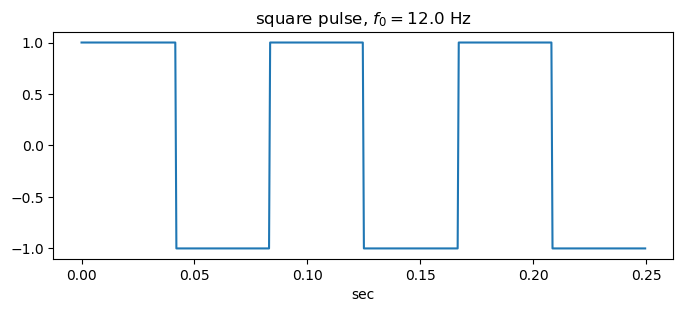

In [4]:
'''
方形波を出力する
'''

# np.random.seed(seed=id_st)
f0 = float(np.random.randint(8,16))
# f0 = 16.
# k_max = 32
k_max = int((fn/f0+1)/2-1)
p0 = f0**-1
t = np.arange(0,3.*p0,dt)
# t = np.arange(0,3*p0,dt)
# t =  np.array(range(n))*dt
nt = len(t)
print("方形波の基本周波数 f0:",f0)
print("k_max :", int((fn/f0+1)/2)-1)
# print("p0:", p0)
print("データ点数 nt:", nt)

y_rect = np.array([1 if (int(i*f0*2) % 2) == 0 else -1 for i in t])

figure(0,figsize=(8,3),dpi=dpi)
plot(t,y_rect)
title('square pulse, $f_{0}=$'+str(f0)+' Hz')
xlabel("sec")

## 1.4 方形波のフーリエ級数を推定する

方形波をフーリエ変換すると、そのフーリエ級数は

\begin{equation}
    X(t) = \sum_{k=1}^{k_{\rm max}}a(k)\sin{(b(k)\omega_{0}t+\phi_{k})}
\end{equation}

という形になり、方形波は $k_{\rm max}$個の sin 関数を合成することで再現することができます。

---
### [課題1]

**フーリエ展開の一般式を用いて方形波のフーリエ級数を導出し、$a(k)$, $b(k)$を推定せよ。**

それぞれ簡単な形の $k$ 関数になります。このセルをダブルクリックして編集可能な状態にし、
以下に $a(k)$ = 2*k/2 (これは例えばの式)のような形で四則演算記号を用いて記述してください。
- $a(k)$ =
- $b(k)$ =

---

## 1.5 振幅($a(k)$)、角周波数成分($b(k)$)の計算

$f_{0}$からナイキスト周波数を超えない周波数の範囲で $k_{\rm max}$ 個の sin 波を合成します。

---
### [課題2]

課題1で導出した方形波のフーリエ級数の振幅 $a(k)$, $b(k)$ の値を $k=1,...,k_{\rm max}$ のそれぞれで計算し、$k_{\rm max}$ 個のリストとして、次のセルの $a(k)$は`col_an =` に、$b(k)$ は `col_bn =` に代入する。

リストは 数値をカンマで区切り、[]で囲む (例えば4個の値のリスト`col_an = [1,2,3,4]`)。
実行するとそれぞれリストが出力されるので入力が正しいか確認する。

---


In [5]:
'''
a(k), b(k) のリストを代入する
'''
###############################################################
col_an = [ (2*i+1)**-1 for i in range(k_max)]
col_bn = [ (2*i+1) for i in range(k_max)]
###############################################################
col_an = np.array(col_an)
col_bn = np.array(col_bn)
col_w = np.array([ 0. for i in range(k_max)])



nk = len(col_an)

print("合成波の個数 nk:",nk)
print("col_an:", col_an)
print("col_bn:", col_bn)


合成波の個数 nk: 42
col_an: [1.         0.33333333 0.2        0.14285714 0.11111111 0.09090909
 0.07692308 0.06666667 0.05882353 0.05263158 0.04761905 0.04347826
 0.04       0.03703704 0.03448276 0.03225806 0.03030303 0.02857143
 0.02702703 0.02564103 0.02439024 0.02325581 0.02222222 0.0212766
 0.02040816 0.01960784 0.01886792 0.01818182 0.01754386 0.01694915
 0.01639344 0.01587302 0.01538462 0.01492537 0.01449275 0.01408451
 0.01369863 0.01333333 0.01298701 0.01265823 0.01234568 0.01204819]
col_bn: [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83]


## 1.6 sin 波の合成

代入した col_an, col_bn の値を用いて、
次のセルを実行すると sin 波の合成が行われ 2 枚の図が出力されます。
1枚目は下段が $k_{\rm max}$ 個の sin 波を別々にプロットしていて、
上段がその sin 波を合成した結果が図示されます。
上段が方形波を再現していればフーリエ級数の重ね合わせによる波形の再現がうまくいったことになります。
方形波になっていない場合には $a(k)$, $b(k)$ が正しくないためであるので推定と計算を見直してください。

2枚目の図は合成波のパワースペクトルで、$k_{\rm max}$個のsin波のパワー(振幅の二乗)が図示されています。

Text(0, 0.5, 'Power')

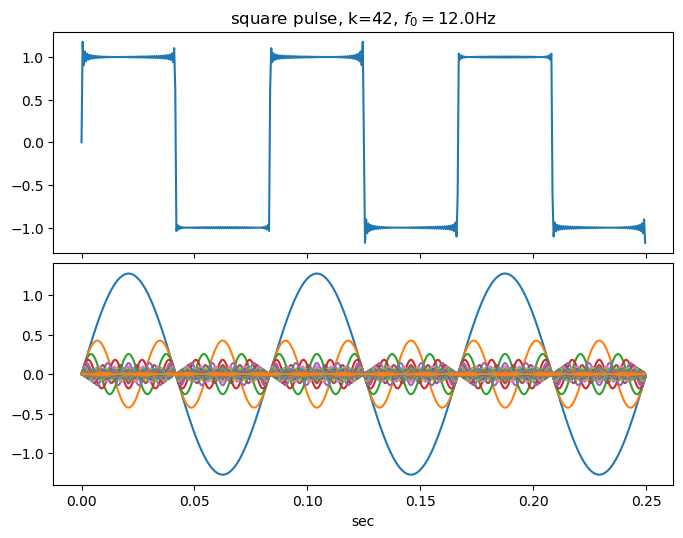

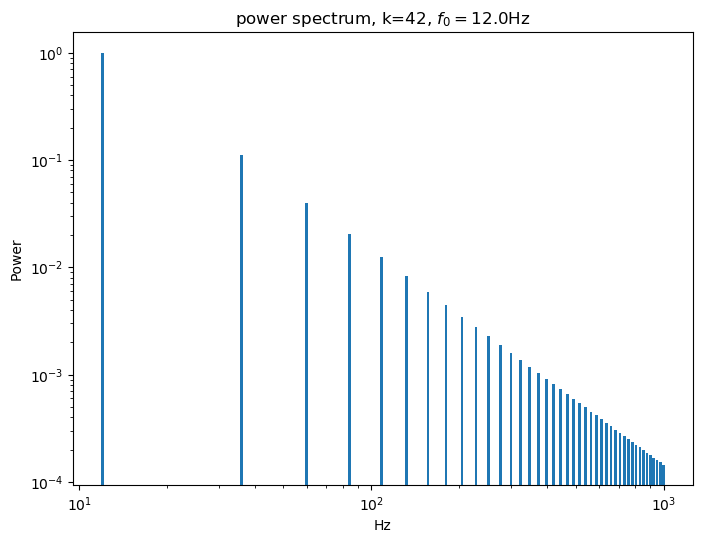

In [6]:
xk = []
x = np.zeros([nt])

for i in range(nk):
    ak = col_an[i]
    f = col_bn[i]*f0
    omega = f*2*np.pi
    power = ak**2
    xk.append(4/np.pi*ak*np.sin(np.array(t)*(omega)+col_w[i]))
    x = x + 4/np.pi*ak*np.sin(np.array(t)*(omega)+col_w[i])


figure(0,figsize=(8,6),dpi=dpi)
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=0.1)
ax_lc = subplot(gs[0:2, 0:4])
title('square pulse, k='+str(nk)+r', $f_{0}=$'+str(f0)+'Hz')
ax_sin = subplot(gs[2:4, 0:4], sharex=ax_lc)
ax_lc.plot(t,x)
setp(ax_lc.get_xticklabels(), visible=False)
for i in range(nk):
    ax_sin.plot(t,xk[i])
xlabel("sec")


figure(1,figsize=(8,6),dpi=dpi)
bar(col_bn*f0, col_an**2,width=col_bn/4.,align="center",log=True)
title('power spectrum, k='+str(nk)+r', $f_{0}=$'+str(f0)+'Hz')
xscale("log")
# yscale("log")
xlabel("Hz")
ylabel("Power")


## 1.6 考察



### ナイキスト周波数とは

### k_max の値

### その他
